In [3]:
import os
os.getcwd()

'C:\\Python\\Backup\\Learnbay\\Projects\\Banking Domain (Sundram 03 July 2022)'

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']

In [5]:
# Import the Dataset
data = pd.read_csv('CreditCard.csv', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

# Step 1: Check for Missing Values

In [7]:
# Step 1: Check for Missing Values

data.isnull().sum()
data.isnull().any()

# Insights: No missing Values

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Step 2: Encoding

In [9]:
# Step 2: Encoding
# a) Label Encoder: Char to Number
# b) One Hot Encoder: Split data into variables basis binary value
# c) Dummy Variables: To avoid Multicollinearity Problem

data.info()

# Since there is no CHAR variable, so no need to do encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Step 3: Outlier Treatment

In [10]:
# Step 3: Outlier Treatment

# Since it is a classification problem and most of the variable values fall within a very small range, 
# Outlier treatment is not required
# Fraudulent Transactions are in fact outliers in Anomaly Detection problems. So we can't remove them

# Step 4: Feature Scaling / Standardization

In [ ]:
# Step 4: Feature Scaling / Standardization

# Not required as we are not applying any distance based model here

# Step 5: Check Imbalance Dataset

In [11]:
# Step 5: Check Imbalance Dataset

data['Class'].value_counts()

# Data is imbalanced as number of '0' > number of '1'
# If Majority >= 2*Minority, then it's Imbalanced Dataset

# Possible Approaches: Oversampling, Undersampling, SMOTE, Class Weight.
# Prefer Oversampling as it always targets the minority class and adds more weights to it while undersampling does the opposite

# We will not apply any treatment here as Percentage of Frauds in Banking Sector is less than 2%. So It's domain specific
# Oversampling is mainly used in retail sector

0    284315
1       492
Name: Class, dtype: int64

# EDA - Exploratory Data Analysis

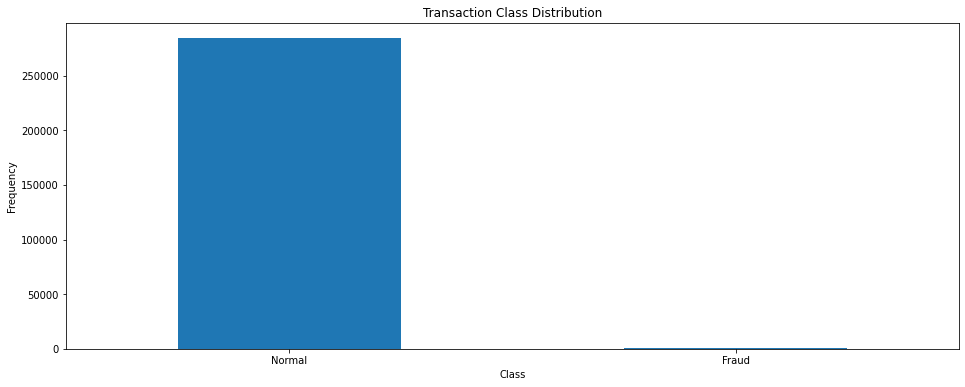

In [15]:
# Frequency of each class in Target Variable
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [16]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [17]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

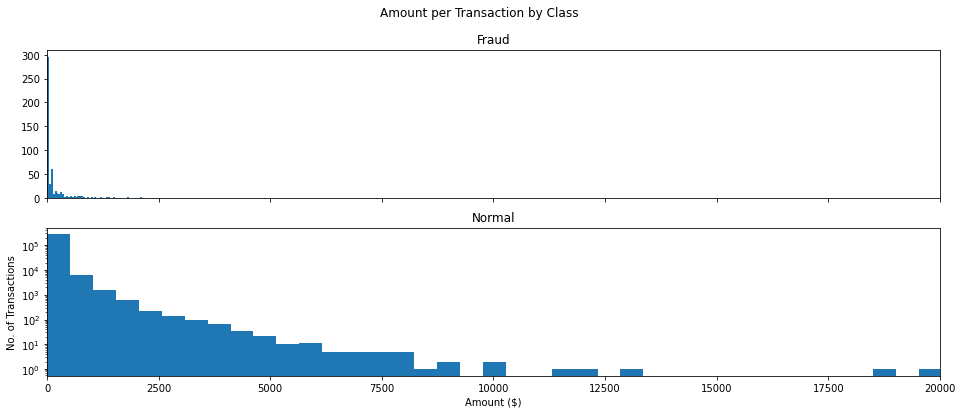

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle("Amount per Transaction by Class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transactions")

plt.xlim(0, 20000)
plt.yscale('log')

plt.show()